In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Config
DATA_DIR = '/Users/Pereiro/.julia/dev/RegulationImageMC_2024/data/0.2.0-ecoli.core/sklearn'

In [5]:
# Load Raw Data
dfpath = os.path.join(DATA_DIR, 'fba.features.df.7809.csv')
rawdata = pd.read_csv(dfpath)

In [37]:
rawdata.describe()

,downset.hash,down_factor,downfactor.PPCK,downfactor.PYK,downfactor.SUCCt3,downfactor.FBP,downfactor.FORt2,downfactor.FORt,downfactor.FRD7,downfactor.GLCpts,...,fba.LDH_D,fba.MDH,fba.ME1,fba.ME2,fba.NADH16,fba.NADTRHD,fba.NH4t,fba.O2t,fba.PDH,fba.biom
count,7.809000e+03,7809.0,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,...,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000,7809.000000
mean,9.233176e+18,0.0,0.861954,0.805737,0.841593,0.827379,0.828531,0.804969,0.835574,0.824561,...,-0.064024,0.747715,0.677812,0.830695,14.992441,4.169853,1.570798,8.428968,3.875224,0.274684
std,5.341231e+18,0.0,0.344970,0.395658,0.365146,0.377944,0.376942,0.396250,0.370685,0.380366,...,0.934325,5.329260,5.367475,3.448499,20.717727,29.630760,2.320511,11.971161,5.719650,0.389396
min,1.962950e+14,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-20.000000,-68.305000,-163.838576,-4.685192,-251.734245,-3.098214,-1.477009,-194.523297,-5.753218,-6.461302
25%,4.653675e+18,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.220983e+18,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,4.794286,0.000000,0.509324,2.500000,0.005670,0.000000
75%,1.385578e+19,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,2.165161,0.000000,0.000000,38.534610,1.201626,4.344224,21.799493,9.282533,0.796696
max,1.844609e+19,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.458191,40.000000,98.305000,98.305000,120.000000,378.220000,82.525035,60.000000,40.000000,0.873922


In [6]:
# Prepare Data
X_raw = rawdata.drop(['downset.hash', 'fba.biom'], axis = 1)
y_raw = rawdata['fba.biom'].copy()

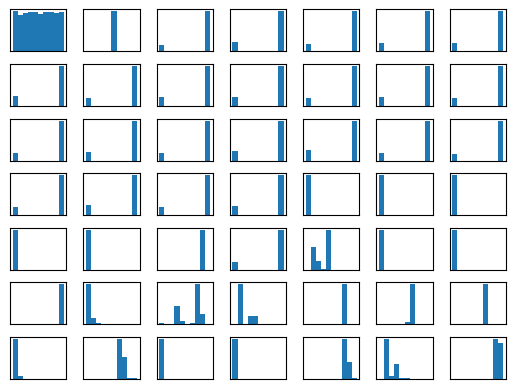

In [20]:
# histograms
ax = rawdata.hist()

for axis in ax.flatten():
    axis.set_xlabel('')
    axis.set_ylabel('')
    axis.set_title('')
    axis.set_xticks([])
    axis.set_yticks([])

# Mostra il grafico
plt.show()

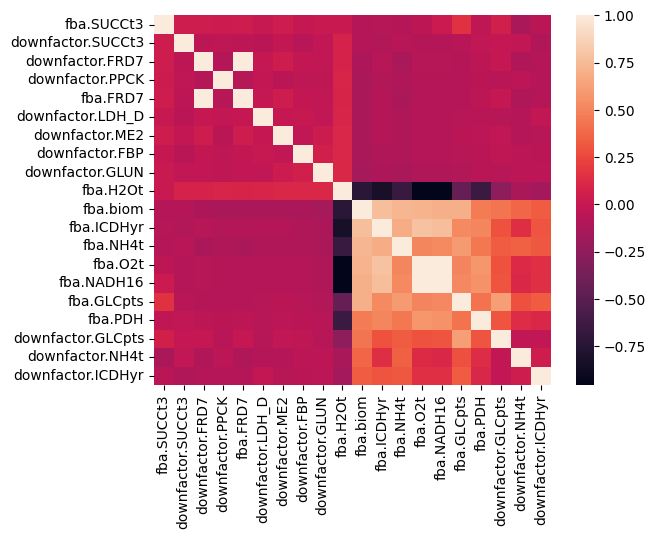

In [31]:
# Corr Preview
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = rawdata.select_dtypes('number').drop('down_factor', axis=1).corr()
sorted_serie = corr_matrix['fba.biom'].sort_values(ascending=False)
ntoshow = 10
toshow_index = sorted_serie[-ntoshow:].index.to_list() + sorted_serie[:ntoshow].index.to_list()
sub_corr_matrix = corr_matrix.loc[toshow_index, toshow_index]
sns.heatmap(sub_corr_matrix, 
                xticklabels=sub_corr_matrix.columns, 
                yticklabels=sub_corr_matrix.columns, 
                annot=False
            );

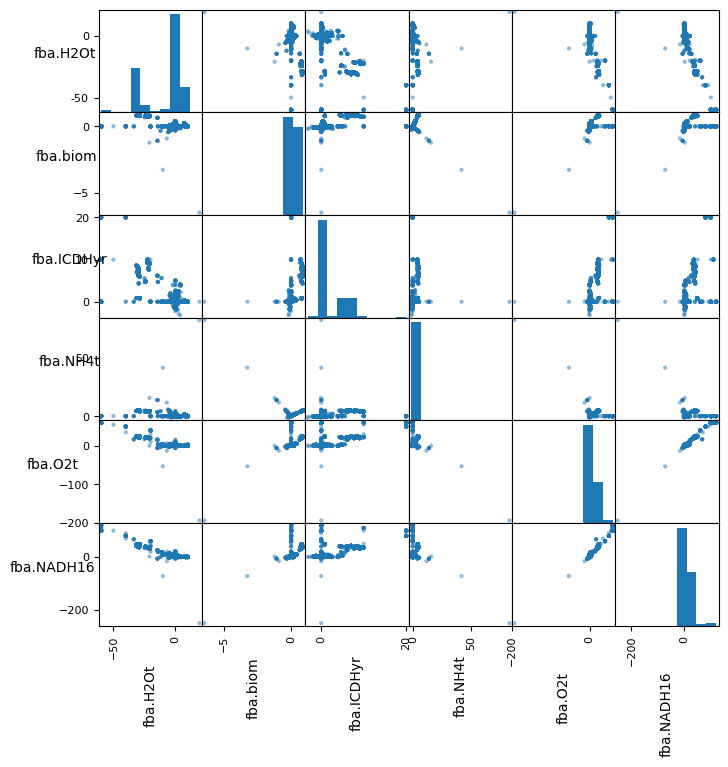

In [35]:
from pandas.plotting import scatter_matrix
toshow_index = sorted_serie[-1:].index.to_list() + sorted_serie[:5].index.to_list()
axes = scatter_matrix(rawdata[toshow_index], figsize=(8, 8));

# Ruota le etichette degli assi
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)

# Mostra il grafico
plt.show()

In [ ]:
# TODO: do the anova example to get which features are correlated significantly

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=50, n_jobs=-1, verbose=1)
rnd_clf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


RandomForestRegressor(n_estimators=50, n_jobs=-1, verbose=1)

In [28]:
# Evaluate performance using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores = cross_val_score(rnd_clf, X, y, scoring='neg_mean_squared_error', cv=10)
# rmse_scores = (-scores)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parall

TypeError: missing a required argument: 'y_pred'

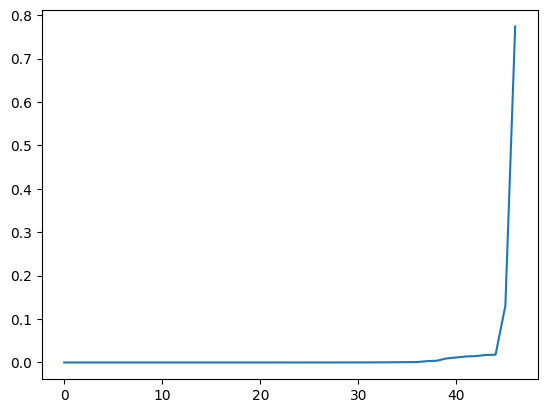

In [41]:
# plt.plot(np.sort(rnd_clf.feature_importances_));


In [55]:
importance = rnd_clf.feature_importances_
indices = np.argsort(-importance)
colnames = X.columns
for idx in indices:
    name = colnames[idx]
    score = importance[idx]
    print(name, " : ", score)

fba.NH4t  :  0.7739789812097444
fba.ICDHyr  :  0.1307702273786815
fba.GLUt2r  :  0.017842703377326193
fba.NADH16  :  0.017318821534185475
fba.GLCpts  :  0.014705068598221946
fba.O2t  :  0.013963163765458633
fba.H2Ot  :  0.011483418034885295
downfactor.GLCpts  :  0.009375145000636064
fba.FORt  :  0.003950799308316418
fba.ME1  :  0.0031418690493109904
fba.FRD7  :  0.000942619449144903
downfactor.NH4t  :  0.0007879419941924981
fba.PYK  :  0.0006246110020436777
fba.PDH  :  0.0003192109013424392
downfactor.PDH  :  0.0002662797081566337
downfactor.FRD7  :  0.00012399081735283313
downfactor.H2Ot  :  0.00011302955357343577
fba.NADTRHD  :  0.0001082764846030287
fba.GND  :  0.00010329609604190145
downfactor.MDH  :  3.7868845449392146e-05
fba.MDH  :  2.1362055696888124e-05
fba.ME2  :  8.319428687732274e-06
downfactor.PYK  :  5.982105027288061e-06
downfactor.ME1  :  2.1062338356929562e-06
fba.SUCCt3  :  1.71076376204325e-06
downfactor.FORt  :  5.37028454540035e-07
fba.PPCK  :  4.7449938370985046e-

array([ 0, 33,  5, 27, 14, 38, 32,  1, 10, 11,  4,  9,  3, 28, 19, 15, 22,
       12, 20, 18, 24,  6, 26, 17,  2, 41, 39, 16, 35, 43, 13,  7, 23, 46,
       25, 21, 30, 40, 29,  8, 36, 45, 31, 42, 34, 37, 44])